In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow_hub as hb
from tensorflow import keras
from tensorflow.keras import layers, models

In [3]:
import PIL
import cv2
import os
import requests

# loading dataset

In [4]:
dataset_url= "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228827136/228813984 [==============================] - 2625s 11us/step


In [10]:
import pathlib

In [11]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [159]:
list(data_dir.glob('*/*.jpg'))[:10]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg')]

In [13]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [158]:
roses=list(data_dir.glob('*roses/*.jpg'))
roses[:10]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg')]

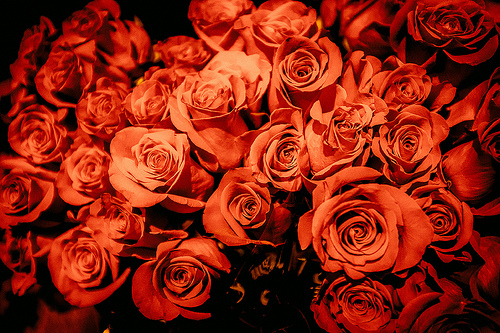

In [15]:
PIL.Image.open(str(roses[2]))

In [157]:
tulips=list(data_dir.glob('*tulips/*.jpg'))
tulips[:10]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10164073235_f29931d91e.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10686568196_b1915544a8.jpg'),
 WindowsPath('datasets/flower_photos/tulips/107693873_86021ac4ea_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10791227_7168491604.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10995953955_089572caf0.jpg')]

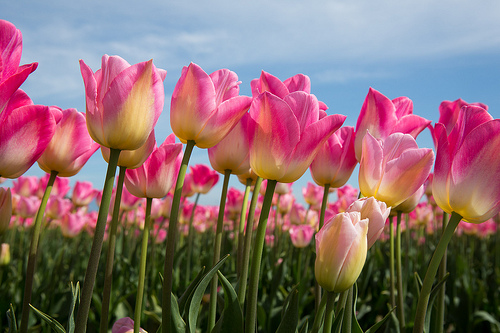

In [17]:
PIL.Image.open(str(tulips[3]))

In [18]:
flower_images_dir={
    'rose':list(data_dir.glob('*roses/*.jpg')),
    'tulip':list(data_dir.glob('*tulips/*.jpg')),
    'daisy':list(data_dir.glob('*daisy/*.jpg')),
    'sunflower':list(data_dir.glob('*sunflowers/*.jpg')),
    'dandelion':list(data_dir.glob('*dandelion/*.jpg'))
}

In [156]:
flower_images_dir['dandelion'][:4]

[WindowsPath('datasets/flower_photos/dandelion/10043234166_e6dd915111_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10200780773_c6051a7d71_n.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10294487385_92a0676c7d_m.jpg'),
 WindowsPath('datasets/flower_photos/dandelion/10437652486_aa86c14985.jpg')]

In [20]:
flower_images_labels={'rose':0,'tulip':1,'daisy':2,'sunflower':3,'dandelion':4}
flower_images_labels['tulip']

1

In [21]:
flower_images_dir['rose'][1]

WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg')

In [24]:
for flower_name,flower_images in flower_images_dir.items():
    print(flower_name)
    print(len(flower_images))

rose
641
tulip
799
daisy
633
sunflower
699
dandelion
898


In [25]:
#Converting images into array
cv2.imread(str(flower_images_dir['rose'][1]))

array([[[10, 16, 15],
        [17, 22, 21],
        [15, 17, 17],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  1,  1]],

       [[15, 21, 20],
        [ 9, 14, 13],
        [ 4,  6,  6],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[16, 22, 21],
        [ 7, 12, 11],
        [ 0,  5,  4],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       ...,

       [[ 0,  2,  2],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  1,  1],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[ 1,  3,  3],
        [ 0,  2,  2],
        [ 0,  2,  2],
        ...,
        [ 0,  2,  2],
        [ 0,  2,  2],
        [ 0,  2,  2]],

       [[ 3,  5,  5],
        [ 3,  5,  5],
        [ 4,  6,  6],
        ...,
        [ 0,  2,  2],
        [ 1,  3,  3],
        [ 1,  3,  3]]], dtype=uint8)

In [26]:
X=[]
y=[]
for flower_name,flower_images in flower_images_dir.items():
    for image in flower_images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flower_images_labels[flower_name])

In [83]:
X[0]

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 16,  7],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 8, 22, 14],
        [ 8, 22, 14],
        [ 7, 21, 14],
        ...,
        [21, 47, 31],
        [24, 49, 34],
        [25, 51, 35]],

       [[12, 22, 15],
        [12, 22, 15],
        [11, 22, 14],
        ...,
        [21, 43, 31],
        [24, 46, 33],
        [26, 48, 36]],

       ...,

       [[17, 29, 25],
        [14, 25, 20],
        [13, 22, 15],
        ...,
        [ 2, 11,  2],
        [ 0,  7,  1],
        [ 0,  4,  0]],

       [[19, 30, 28],
        [18, 28, 25],
        [16, 25, 19],
        ...,
        [ 2, 10,  2],
        [ 1,  8,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [15, 23, 22],
        [19, 27, 24],
        ...,
        [ 1, 11,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [28]:
len(X)

3670

In [58]:
y[:5]

[0, 0, 0, 0, 0]

In [29]:
len(y)

3670

In [30]:
X=np.array(X)
y=np.array(y)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=10,stratify=y)

In [33]:
len(X_train)

2936

In [34]:
len(X_test)

734

In [35]:
X.shape

(3670, 224, 224, 3)

# Scaling my  data set between 0 and 1

In [36]:
X_train_scale=X_train/255
X_test_scale=X_test/255

# Training model

In [42]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hb.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [84]:
model = keras.Sequential([
  pretrained_model_without_top_layer,
  layers.Dense(5)
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [85]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [86]:
model.fit(X_train_scale,y_train,epochs=5)

Epoch 1/5
92/92 [==============================] - 105s 780ms/step - loss: 0.8216 - acc: 0.6880
Epoch 2/5
92/92 [==============================] - 71s 777ms/step - loss: 0.4219 - acc: 0.8518
Epoch 3/5
92/92 [==============================] - 74s 804ms/step - loss: 0.3346 - acc: 0.8859
Epoch 4/5
92/92 [==============================] - 72s 784ms/step - loss: 0.2768 - acc: 0.9084
Epoch 5/5
92/92 [==============================] - 73s 793ms/step - loss: 0.2413 - acc: 0.9271


In [142]:
model.evaluate(X_test_scale,y_test)

23/23 [==============================] - 18s 735ms/step - loss: 0.3557 - acc: 0.8869


[0.3556651473045349, 0.8869209885597229]

# Making some predictions

In [143]:
def predict(img_array):
    img_array=img_array[np.newaxis,...]              #Reshaping img_array from (224,224,3) into (1,224,224,3)       
    prediction=model.predict(img_array)           #Prediction      
    prediction=tf.nn.softmax(prediction)             #Appling softmax to scale prediction between 0 and 1       
    y_predicted=np.argmax(prediction)                #Appling argamx to find out the label of flower      
    for key,value in flower_images_labels.items():   #Finding flower name from flower_images_labels dictionary
        if y_predicted==value:
            print(key,"(",value,")")
            return

In [144]:
predict(X_test[4])

dandelion ( 4 )


In [145]:
y_test[4]

4

In [146]:
predict(X_test[189])

daisy ( 2 )


In [147]:
y_test[189]

2

In [148]:
predict(X_test[201])

rose ( 0 )


In [149]:
y_test[201]

0

In [150]:
predict(X_test[53])

dandelion ( 4 )


In [151]:
y_test[53]

4